#Load the CSV File (Taxi Zone Lookup)

In [0]:
taxi_zone_lookup = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/21784980@students.ltu.edu.au/taxi_zone_lookup__1_.csv")
taxi_zone_lookup.printSchema()
taxi_zone_lookup.show(5)

root
-- LocationID: string (nullable = true)
-- Borough: string (nullable = true)
-- Zone: string (nullable = true)
-- service_zone: string (nullable = true)

+----------+-------------+--------------------+------------+
LocationID| Borough| Zone|service_zone|
+----------+-------------+--------------------+------------+
 1| EWR| Newark Airport| EWR|
 2| Queens| Jamaica Bay| Boro Zone|
 3| Bronx|Allerton/Pelham G...| Boro Zone|
 4| Manhattan| Alphabet City| Yellow Zone|
 5|Staten Island| Arden Heights| Boro Zone|
+----------+-------------+--------------------+------------+
only showing top 5 rows

#Load Parquet Files (Taxi Trip Data)

In [0]:
# Load all Parquet files (2020) into a single DataFrame
taxi_data = spark.read.parquet("dbfs:/FileStore/shared_uploads/21784980@students.ltu.edu.au/yellow_tripdata_2020_*.parquet")

# Show the schema and first few rows to understand the structure
taxi_data.printSchema()
taxi_data.show(5)


root
-- VendorID: long (nullable = true)
-- tpep_pickup_datetime: timestamp (nullable = true)
-- tpep_dropoff_datetime: timestamp (nullable = true)
-- passenger_count: double (nullable = true)
-- trip_distance: double (nullable = true)
-- RatecodeID: double (nullable = true)
-- store_and_fwd_flag: string (nullable = true)
-- PULocationID: long (nullable = true)
-- DOLocationID: long (nullable = true)
-- payment_type: long (nullable = true)
-- fare_amount: double (nullable = true)
-- extra: double (nullable = true)
-- mta_tax: double (nullable = true)
-- tip_amount: double (nullable = true)
-- tolls_amount: double (nullable = true)
-- improvement_surcharge: double (nullable = true)
-- total_amount: double (nullable = true)
-- congestion_surcharge: double (nullable = true)
-- airport_fee: integer (nullable = true)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
 1| 2020-01-01 00:28:15| 2020-01-01 00:33:03| 1.0| 1.2| 1.0| N| 238| 239| 1| 6.0| 3.0| 0.5| 1.47| 0.0| 0.3| 11.27| 2.5| null|
 1| 2020-01-01 00:35:39| 2020-01-01 00:43:04| 1.0| 1.2| 1.0| N| 239| 238| 1| 7.0| 3.0| 0.5| 1.5| 0.0| 0.3| 12.3| 2.5| null|
 1| 2020-01-01 00:47:41| 2020-01-01 00:53:52| 1.0| 0.6| 1.0| N| 238| 238| 1| 6.0| 3.0| 0.5| 1.0| 0.0| 0.3| 10.8| 2.5| null|
 1| 2020-01-01 00:55:23| 2020-01-01 01:00:14| 1.0| 0.8| 1.0| N| 238| 151| 1| 5.5| 0.5| 0.5| 1.36| 0.0| 0.3| 8.16| 0.0| null|
 2| 2020-01-01 00:01:58| 2020-01-01 00:04:16| 1.0| 0.0| 1.0| N| 193| 193| 2| 3.5| 0.5| 0.5| 0.0| 0.0| 0.3| 4.8| 0.0| null|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
only showing top 5 rows

#Calculate Carbon Emissions for Each Ride

In [0]:
from pyspark.sql.functions import col

# Calculate fuel consumed and CO2 emissions
taxi_data = taxi_data.withColumn("fuel_consumed_gallons", col("trip_distance") / 22)
taxi_data = taxi_data.withColumn("CO2_emissions_kg", col("fuel_consumed_gallons") * 8.89)

# Filter out rows with trip_distance = 0 and sort by trip_distance in descending order
filtered_sorted_data = taxi_data.filter(col("trip_distance") > 0)

# Show the filtered and sorted DataFrame
filtered_sorted_data.select("trip_distance", "fuel_consumed_gallons", "CO2_emissions_kg").show()

+-------------+---------------------+--------------------+
trip_distance|fuel_consumed_gallons| CO2_emissions_kg|
+-------------+---------------------+--------------------+
 1.2| 0.05454545454545454| 0.4849090909090909|
 1.2| 0.05454545454545454| 0.4849090909090909|
 0.6| 0.02727272727272727| 0.24245454545454545|
 0.8| 0.03636363636363637| 0.3232727272727273|
 0.03| 0.001363636363636...|0.012122727272727273|
 0.7| 0.031818181818181815| 0.2828636363636364|
 2.4| 0.10909090909090909| 0.9698181818181818|
 0.8| 0.03636363636363637| 0.3232727272727273|
 3.3| 0.15| 1.3335000000000001|
 1.07| 0.04863636363636364| 0.4323772727272728|
 7.76| 0.3527272727272727| 3.1357454545454546|
 1.6| 0.07272727272727274| 0.6465454545454546|
 0.5| 0.022727272727272728| 0.20204545454545456|
 1.7| 0.07727272727272727| 0.6869545454545455|
 8.45| 0.38409090909090904| 3.4145681818181814|
 1.5| 0.06818181818181818| 0.6061363636363636|
 2.9| 0.1318181818181818| 1.1718636363636363|
 1.9| 0.08636363636363636| 0.7677727272727274|
 4.2| 0.19090909090909092| 1.6971818181818183|
 1.5| 0.06818181818181818| 0.6061363636363636|
+-------------+---------------------+--------------------+
only showing top 20 rows

#Aggregate Emissions Based on Passenger Count

In [0]:
from pyspark.sql.functions import to_date, sum

# Create a date column from pickup_datetime
taxi_data = taxi_data.withColumn("date", to_date(col("tpep_pickup_datetime")))

# Aggregate emissions for 1-2 passengers
emissions_1_2 = taxi_data.filter(col("passenger_count") <= 2).groupBy("date").agg(sum("CO2_emissions_kg").alias("total_emissions_1_2"))

# Aggregate emissions for 3 or more passengers
emissions_3_plus = taxi_data.filter(col("passenger_count") >= 3).groupBy("date").agg(sum("CO2_emissions_kg").alias("total_emissions_3_plus"))

# Join the results for comparison
emissions_per_day = emissions_1_2.join(emissions_3_plus, on="date", how="inner")
emissions_per_day.show(5)


+----------+-------------------+----------------------+
 date|total_emissions_1_2|total_emissions_3_plus|
+----------+-------------------+----------------------+
2020-01-21| 211923.99425913865| 25555.22632727258|
2009-01-01| 95.0664272727273| 18.786186363636364|
2020-01-17| 239177.10552279648| 30212.96402727228|
2019-12-18| 0.0| 0.0|
2020-01-25| 199897.23453641267| 28854.159854545414|
+----------+-------------------+----------------------+
only showing top 5 rows

#Plot Total Emissions per Day

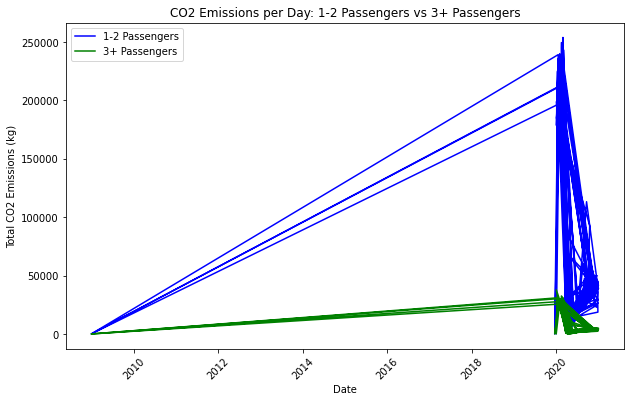

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the result to Pandas DataFrame for plotting
emissions_df = emissions_per_day.toPandas()

# Plot the emissions
plt.figure(figsize=(10,6))
plt.plot(emissions_df['date'], emissions_df['total_emissions_1_2'], label="1-2 Passengers", color='blue')
plt.plot(emissions_df['date'], emissions_df['total_emissions_3_plus'], label="3+ Passengers", color='green')
plt.xlabel("Date")
plt.ylabel("Total CO2 Emissions (kg)")
plt.title("CO2 Emissions per Day: 1-2 Passengers vs 3+ Passengers")
plt.legend()
plt.xticks(rotation=45)
plt.show()
